# Análisis Exploratorio de Datos - CineVision Studios

In [18]:

# =========================================
# CARGA DE LIBRERÍAS Y DATOS
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv("movies.csv", encoding="latin1")

# Asegurar que releaseDate sea de tipo fecha
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")

# Extraer el año de lanzamiento en una nueva columna
df["releaseYear"] = df["releaseDate"].dt.year

# Vista rápida de los datos
df.head(3)

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,1995-12-09,5.7,2077,2,2,1,25,15,9,1995
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,1993-10-15,6.5,223,3,3,2,15,3,9,1993
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,1977-05-25,8.2,16598,3,2,1,105,5,62,1977


## a) ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [19]:
# Ordenar el DataFrame por presupuesto (budget) en orden descendente
df_sorted = df.sort_values(by="budget", ascending=False)

print("10 Películas con mayor presupuesto:")
df_sorted[["title", "budget"]].head(10)  # Mostramos el DataFrame al final de la celda

10 Películas con mayor presupuesto:


,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4710,Avengers: Age of Ultron,365000000
5952,Avengers: Endgame,356000000
4953,Justice League,300000000
5953,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
607,Superman Returns,270000000
7134,The Lion King,260000000
3791,Tangled,260000000
280,Spider-Man 3,258000000


## b) ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [20]:
# Ordenar por revenue descendente
highest_revenue = df.sort_values(by="revenue", ascending=False)

print("10 Películas con más ingresos:")
highest_revenue[["title", "revenue"]].head(10)

10 Películas con más ingresos:


,title,revenue
3210,Avatar,2.847246e+09
5952,Avengers: Endgame,2.797801e+09
307,Titanic,2.187464e+09
4947,Star Wars: The Force Awakens,2.068224e+09
5953,Avengers: Infinity War,2.046240e+09
4914,Jurassic World,1.671713e+09
7134,The Lion King,1.667635e+09
9049,Spider-Man: No Way Home,1.631853e+09
3397,The Avengers,1.518816e+09
5087,Furious 7,1.515048e+09


## c) ¿Cuál es la película que más votos tuvo?

In [21]:
# Película con más votos
df_votes = df.loc[df["voteCount"].idxmax()]

print("Película con más votos:")
df_votes[["title", "voteCount"]]

Película con más votos:


title        Inception
voteCount        30788
Name: 3511, dtype: object

## e) ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?
### (Incluye el gráfico de barras)

Cantidad de peliculas cada año releaseYear
1902      1
1920      1
1921      1
1922      1
1925      2
       ... 
2018    629
2019    612
2020    533
2021    816
2022      7
Name: count, Length: 99, dtype: int64

El año con más películas fue 2021 con 816 películas.


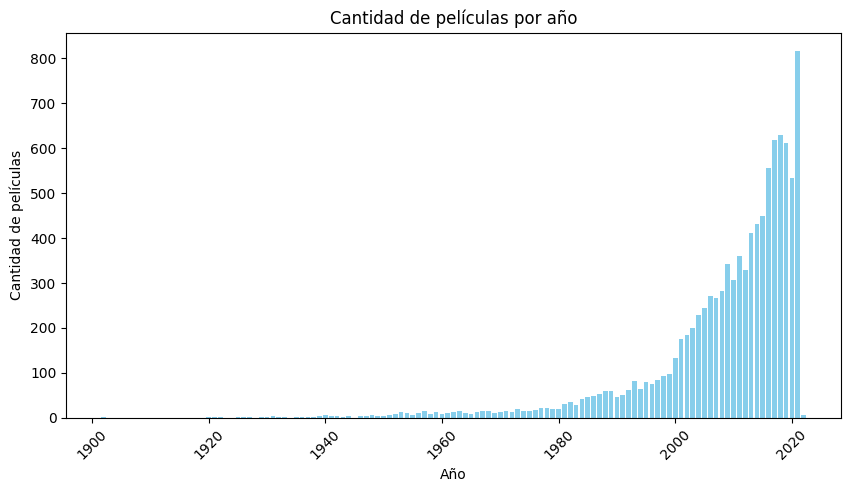

In [23]:
# Contar películas por año
df_date = df["releaseYear"].value_counts().sort_index()

# Asegurar que releaseDate es de tipo fecha
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")
# Extraer el año
df["releaseYear"] = df["releaseDate"].dt.year 

print("Cantidad de peliculas cada año", df_date)

# Identificar el año con más películas
movies_year = df_date.idxmax()
movies_count = df_date.max()
print(f"\nEl año con más películas fue {movies_year} con {movies_count} películas.")

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(df_date.index, df_date.values, color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas por año')
plt.xticks(rotation=45)
plt.show()

## f) Género principal de las 20 películas más recientes

In [24]:
# Ordenar por fecha de lanzamiento (más reciente a más antigua) y tomar 20
df_recent = df.sort_values(by="releaseDate", ascending=False).head(20)

# Extraer el primer género
df_recent["main_genre"] = df_recent["genres"].astype(str).str.split("|").str[0]

print("Género principal de las 20 películas más recientes:")
df_recent[["title", "releaseDate", "main_genre"]]

Género principal de las 20 películas más recientes:


,title,releaseDate,main_genre
9516,A Shot Through the Wall,2022-01-21,Drama
9545,Presque,2022-01-19,Comedy
9197,Italian Studies,2022-01-14,Drama
9808,See for Me,2022-01-07,Thriller
9586,American Siege,2022-01-07,Action
9982,Harry Potter 20th Anniversary: Return to Hogwarts,2022-01-01,Documentary
9951,WWE Day 1 2022,2022-01-01,Action
9257,Return of Chucky,2021-12-31,nan
9241,"Karem, La Posesión",2021-12-31,nan
9866,Gabriel's Rapture: Part One,2021-12-31,Romance


### ¿Cuál es el género principal que predomina en el conjunto de datos?

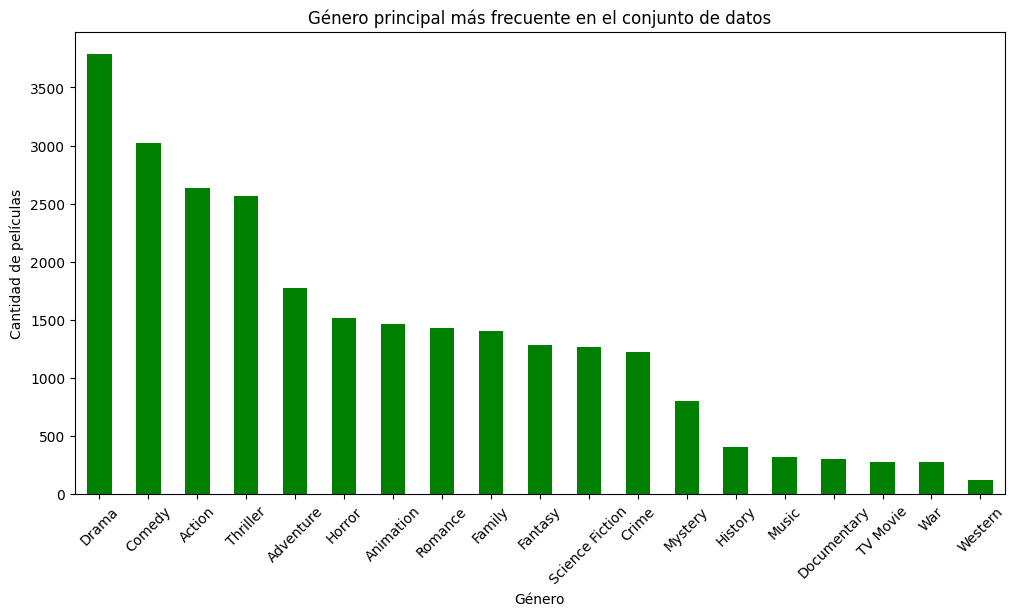

El género principal más común en el conjunto de datos es: Drama


In [25]:
# Dividir la columna "genres" en listas y contar frecuencia
df_principal_genre = df["genres"].dropna().str.split("|").explode()
genre_counts = df_principal_genre.value_counts()

genre_counts.head(10)  # Ver las 10 categorías más frecuentes

# Graficar la frecuencia de cada género
plt.figure(figsize=(12, 6))
genre_counts.plot(kind="bar", color="green")
plt.title("Género principal más frecuente en el conjunto de datos")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)
plt.show()

# Género más común
common_genre = genre_counts.idxmax()
print(f"El género principal más común en el conjunto de datos es: {common_genre}")

### ¿A qué género principal pertenecen las películas más largas?

In [26]:
# Ordenar por duración (runtime) y tomar algunas de las más largas
df_largo = df.sort_values(by="runtime", ascending=False).head(10)

# Extraer el primer género
df_largo["main_genre"] = df_largo["genres"].astype(str).str.split("|").str[0]

print("Películas más largas (top 10) con su género principal:")
df_largo[["title", "runtime", "main_genre"]]

Películas más largas (top 10) con su género principal:


,title,runtime,main_genre
9347,How Ponyo was Born ~Hayao Miyazaki's Thought P...,750,Documentary
5358,Crystal Lake Memories: The Complete History of...,400,Documentary
3885,Napoleon,333,Drama
962,1900,317,Drama
1263,Cleopatra,248,Drama
7065,Kill Bill: The Whole Bloody Affair,247,Action
9686,Zack Snyder's Justice League,242,Action
1948,Hamlet,242,Drama
6159,WWE Wrestlemania 31,240,Action
5592,WWE WrestleMania XXX,240,Action


## g) ¿Las películas de qué género principal obtuvieron mayores ganancias?

In [27]:
# Asegurar que 'revenue' sea numérico
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce").fillna(0)

# Extraer el primer género de cada película
df["main_genre"] = df["genres"].astype(str).str.split("|").str[0]

# Agrupar por género principal y sumar las ganancias
genre_revenue = df.groupby("main_genre")["revenue"].sum().sort_values(ascending=False)

if genre_revenue.empty:
    print("No hay datos suficientes para calcular el género con mayores ganancias.")
else:
    top_genre = genre_revenue.idxmax()
    top_revenue = genre_revenue.max()
    print(f"El género principal con mayores ganancias es '{top_genre}' con un total de ${top_revenue:,.2f}.")
    
genre_revenue.head(10)

El género principal con mayores ganancias es 'Action' con un total de $140,936,671,043.00.


main_genre
Action             1.409367e+11
Adventure          8.631329e+10
Comedy             7.299007e+10
Drama              6.641512e+10
Animation          4.419367e+10
Family             2.707047e+10
Science Fiction    2.577102e+10
Horror             2.348347e+10
Fantasy            2.230947e+10
Thriller           1.711143e+10
Name: revenue, dtype: float64

## j) ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [28]:
# Ordenar por voteAvg (desc) y tomar las primeras 20
df_director = df.sort_values(by="voteAvg", ascending=False).head(20)

# Eliminar nulos en director
df_director = df_director.dropna(subset=["director"])

print("Directores que hicieron las 20 películas mejor calificadas:")
df_director[["director", "title", "voteAvg"]]

Directores que hicieron las 20 películas mejor calificadas:


,director,title,voteAvg
9298,Laurent Bouzereau,Spirit of Vengeance: The Making of 'Ghost Rider',10.0
9733,Christin Baker,Christmas at the Ranch,10.0
9246,Rebecca Sugar,Steven Universe: The Movie: Behind the Curtain,10.0
9990,Miguel Angel Zavala,Los Vengadores Chiflados,10.0
8632,Thomas Coven,Hot Naked Sex & the City,10.0
9347,Kaku Arakawa,How Ponyo was Born ~Hayao Miyazaki's Thought P...,10.0
9084,Víctor Barba|Juan Olivares,Holidays,10.0
6885,Dave Bullock|Troy Adomitis|Victor Cook,The Spectacular Spider-Man Attack of the Lizard,9.6
9368,Won Myeong-jun,Aunt's Temptation 3,9.5
6170,Samuel Leong,Ebola Zombies,9.5


## l) ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?
### (Incluye gráfica de ingresos por mes)

Ingresos totales por mes de lanzamiento:
releaseMonth
1     2.202045e+10
2     3.029330e+10
3     4.165949e+10
4     3.660657e+10
5     6.131612e+10
6     7.759788e+10
7     6.173530e+10
8     3.284068e+10
9     3.445130e+10
10    4.163847e+10
11    5.769413e+10
12    6.952555e+10
Name: revenue, dtype: float64


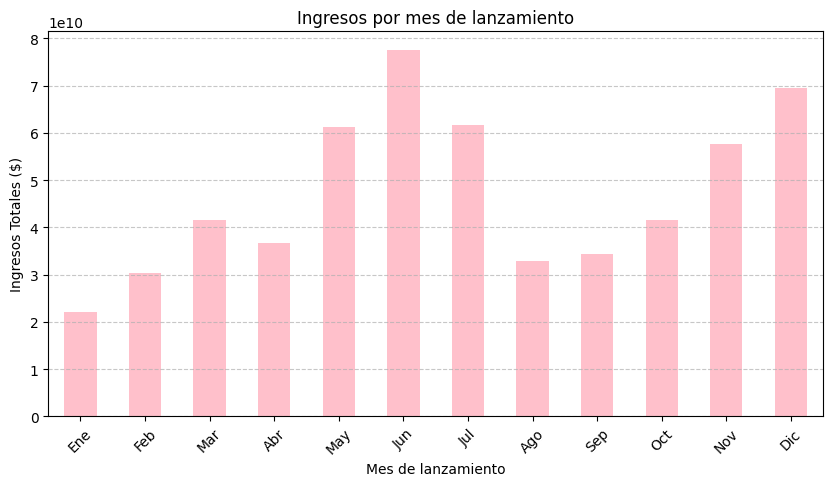

In [32]:
# Asegurar que 'releaseDate' es de tipo fecha
df["releaseDate"] = pd.to_datetime(df["releaseDate"], errors="coerce")

# Crear una nueva columna con el mes de lanzamiento
df["releaseMonth"] = df["releaseDate"].dt.month

# Agrupar por mes y sumar los ingresos
mes_revenue = df.groupby("releaseMonth")["revenue"].sum()

# Ordenar los meses correctamente (de enero a diciembre)
mes_revenue = mes_revenue.reindex(range(1, 13), fill_value=0)

print("Ingresos totales por mes de lanzamiento:")
print(mes_revenue)

# Gráfico de barras
plt.figure(figsize=(10, 5))
mes_revenue.plot(kind="bar", color="pink")
plt.xticks(
    ticks=range(12),
    labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
            "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"],
    rotation=45
)
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingresos Totales ($)")
plt.title("Ingresos por mes de lanzamiento")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()